## Описание проекта

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Необходимо выбрать топ-10 городов по количеству рейсов, а также построить графики: 
* количество рейсов в зависимости от модели самолета;
* количество рейсов в зависимости от города;
* топ-10 городов по количеству рейсов.

Затем сделать выводы.

## Изучение данных

**Импортируем библиотеки**

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

**Получим общую информацию о наших данных**

In [2]:
try:
    query_1 = pd.read_csv('/datasets/query_1.csv')
    query_3 = pd.read_csv('/datasets/query_3.csv')

except:
    query_1 = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')
    query_3 = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

for data in [query_1, query_3]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None



В наших данных нет пропущенных значений

**Проверим данные на наличие дубликатов**

In [3]:
for data in [query_1, query_3]: 
    print('Количество дубликатов: {}'.format(data.duplicated().sum()))

Количество дубликатов: 0
Количество дубликатов: 0


В наших данных дубликатов нет

## Анализ данных

**Изменим тип данных для average_flights на int**

In [4]:
query_3['average_flights'] = query_3['average_flights'].astype('int')

**Выведем топ-10 городов по количеству рейсов**

In [5]:
top10_cities = query_3.sort_values(by='average_flights', ascending=False).head(10)
top10_cities

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


В топ-10 городов по количеству рейсов входят: Москва, Санкт-Петербург, Новосибирск, Екатеринбург, Красноярск, Пермь, Ростов-на-Дону, Брянск, Ульяновск и Советский.

**Построим график количества рейсов в зависимости от модели самолета**

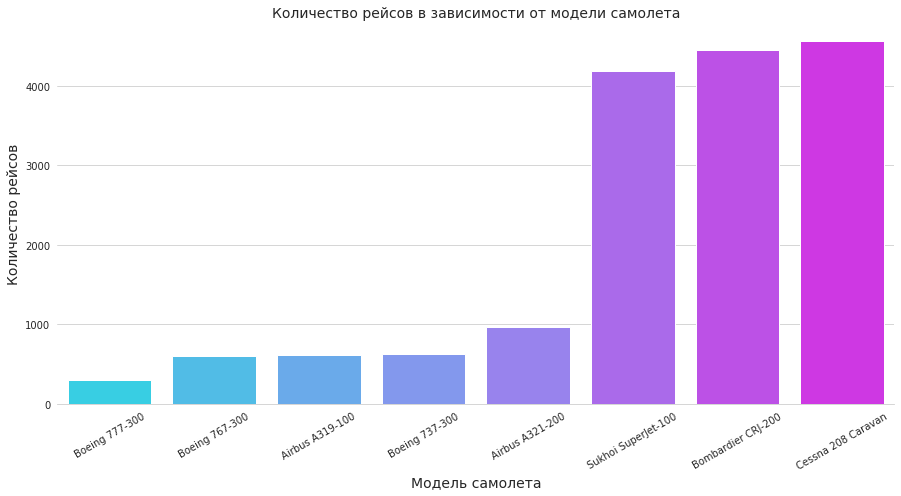

In [6]:
summary_model = query_1.sort_values(by='flights_amount')

sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
plt.title('Количество рейсов в зависимости от модели самолета', fontsize=14)
sns.barplot(x='model', y='flights_amount', data=summary_model, label='line', palette='cool')
sns.despine(left=True)
plt.xlabel('Модель самолета', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.xticks(rotation=30)
plt.show()

Самолеты моделей Sukhoi SuperJet-100, Bombardier CRJ-200 и Cessna 208 Caravan совершают значительно большее количество полетов по сравнению с другими моделями. Меньше всего перелетов у Boeing 777-300.

**Построим график количества рейсов, прибывающих в города**

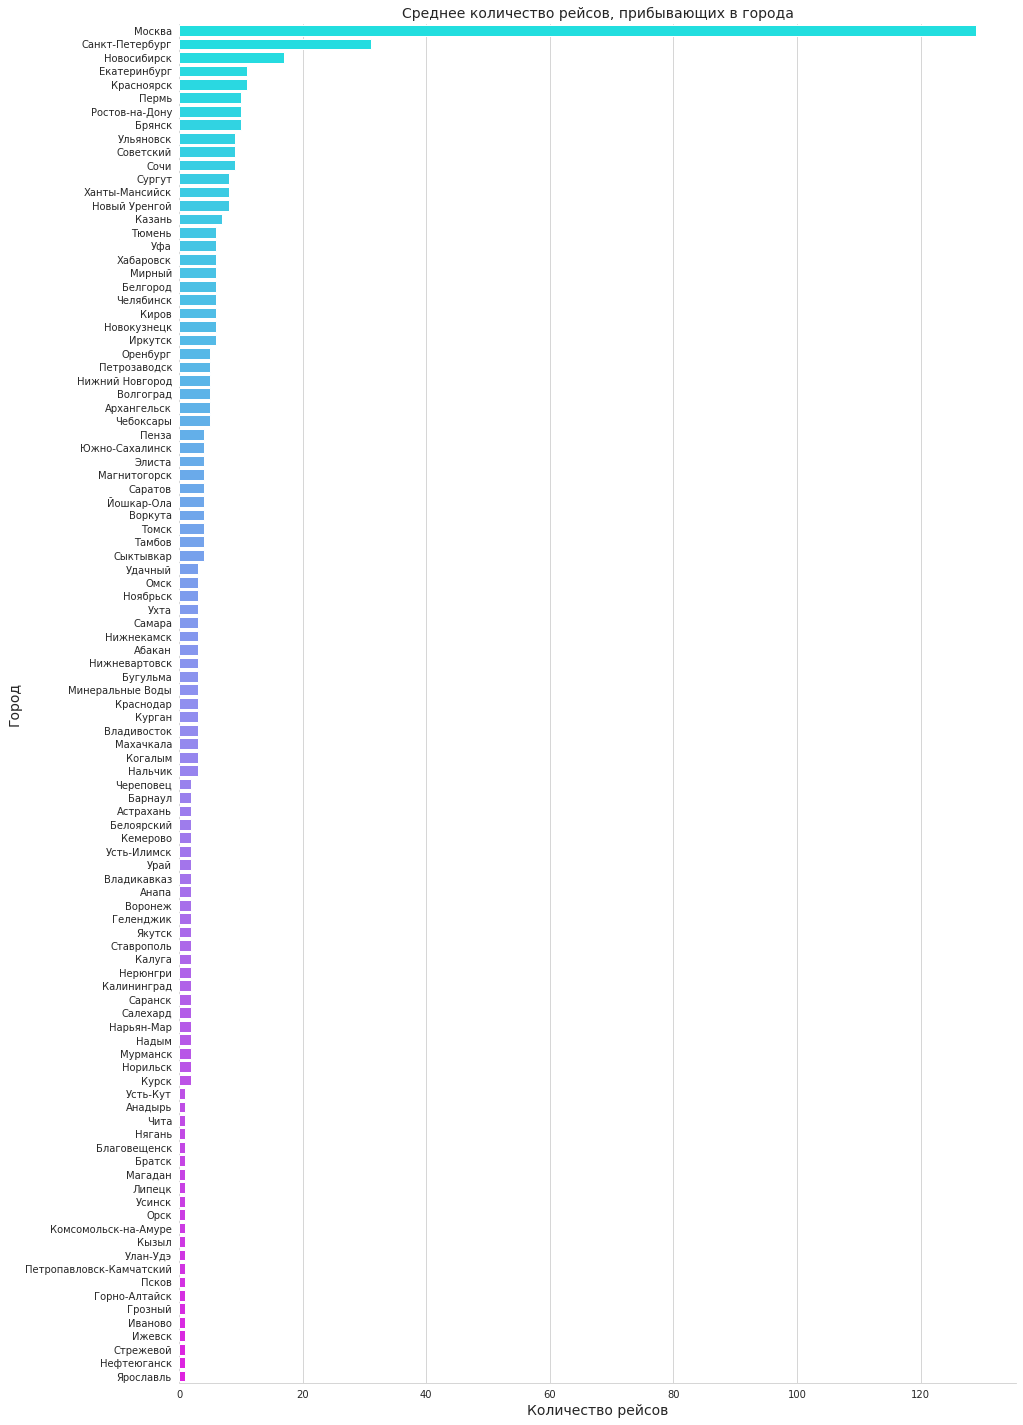

In [7]:
summary_city = query_3.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(15, 25))
plt.title('Среднее количество рейсов, прибывающих в города', fontsize=14)
sns.barplot(x='average_flights', y='city', data=summary_city, palette='cool')
sns.despine(left=True)
plt.ylabel('Город', fontsize=14)
plt.xlabel('Количество рейсов', fontsize=14)
plt.show()

По количеству рейсов, пребывающих в города лидирут Москва, в остальных же городах перелетов мало. После Москвы идёт Санкт-Петербург, Новосибирск, Екатеринбург и Красноярск.

**Построим график для топ-10 городов по количеству рейсов**

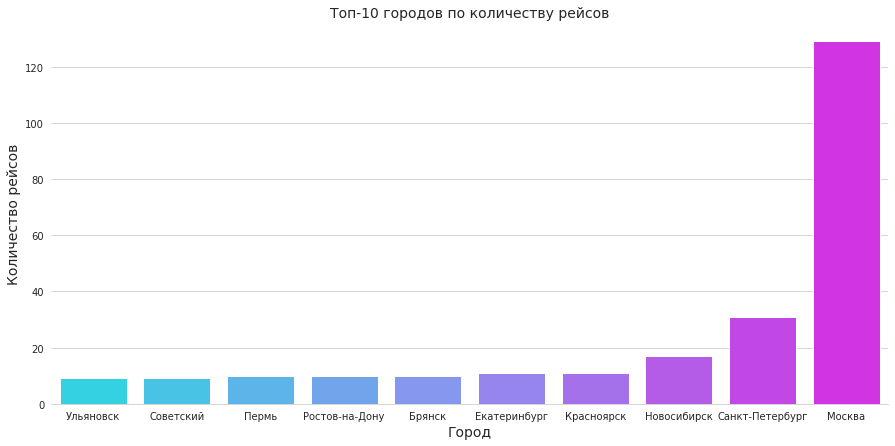

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
plt.title('Топ-10 городов по количеству рейсов', fontsize=14)
sns.barplot(x='city', y='average_flights', data=top10_cities.sort_values(by='average_flights', ascending=True), palette='cool')
sns.despine(left=True)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.show()

В число явных лидеров входят: Москва, Санкт-Петербург и Новосибирск. В то время как в остальных городах, попавших в топ-10, всего около 10 перелетов.

## Общий  вывод

* В топ-10 городов по количеству рейсов входят: Москва, Санкт-Петербург, Новосибирск, Екатеринбург, Красноярск, Пермь, Ростов-на-Дону, Брянск, Ульяновск и Советский.
* В числе явных лидеров топ-10 городов по количеству рейсов входят: Москва, Санкт-Петербург и Новосибирск. В то время как в остальных городах, попавших в топ-10, всего около 10 перелетов.
* Самолеты моделей Sukhoi SuperJet-100, Bombardier CRJ-200 и Cessna 208 Caravan совершают значительно большее количество полетов по сравнению с другими моделями. Меньше всего перелетов у Boeing 777-300.
* По количеству рейсов, пребывающих в города, с большим отрывом лидирут Москва, затем идёт Санкт-Петербург, Новосибирск, Красноярск и Екатеринбург.